In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
img_width = 256
img_height = 256
img_channels = 1

In [3]:
image_path = 'C:/Users/shubh/Notebook/Farmland/data/images'
mask_path = 'C:/Users/shubh/Notebook/Farmland/data/masks'

In [4]:
X_train = []
for filename in os.listdir(image_path):
    img = cv2.imread(os.path.join(image_path,filename), cv2.IMREAD_ANYDEPTH)
    X_train.append(img)

In [5]:
X_train = np.array(X_train)

In [6]:
X_train.shape

(10043, 256, 256)

In [7]:
Y_train = []
for filename in os.listdir(mask_path):
    img = cv2.imread(os.path.join(mask_path,filename))
    Y_train.append(img)

In [8]:
Y_train = np.array(Y_train)
Y_train = Y_train[:,:,:,0]

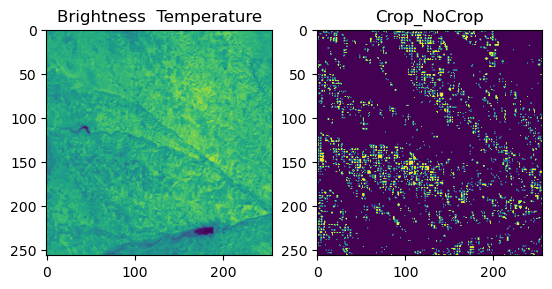

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(X_train[10042])
ax1.set_title('Brightness  Temperature')
ax2.imshow(Y_train[10042])
ax2.set_title('Crop_NoCrop')

plt.show()

In [10]:
seed = 83
np.random.seed = seed

In [11]:
#Building UNET

inputs = tf.keras.layers.Input((img_width, img_height, img_channels))
s = tf.keras.layers.Lambda(lambda x:x/255)(inputs)

#Contraction Path
c1 = tf.keras.layers.Conv2D(8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPool2D((2,2))(c1)


c2 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPool2D((2,2))(c2)


c3 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPool2D((2,2))(c3)


c4 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPool2D((2,2))(c4)


c5 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansion Path
u6 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)


u7 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)


u8 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
c8 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)


u9 = tf.keras.layers.Conv2DTranspose(8, (2,2), strides=(2,2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1])
c9 = tf.keras.layers.Conv2D(8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 8)  80          lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 8)  0           conv2d[0][0]                     
______________________________________________________________________________________________

In [12]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('C:/Users/shubh/Notebook/Farmland/CropNoCrop.h5', verbose=1, save_best_only=True)

'''callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs') ]'''

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='logs') ]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=100, callbacks=callbacks)


Epoch 1/100
565/565 [==============================] - 31s 47ms/step - loss: -390.6869 - accuracy: 0.0013 - val_loss: -331.4709 - val_accuracy: 0.0000e+00
Epoch 2/100
565/565 [==============================] - 25s 44ms/step - loss: -394.7683 - accuracy: 8.7015e-06 - val_loss: -331.4709 - val_accuracy: 0.0000e+00
Epoch 3/100
565/565 [==============================] - 25s 44ms/step - loss: -394.7734 - accuracy: 3.6433e-06 - val_loss: -331.4709 - val_accuracy: 0.0000e+00
Epoch 4/100
565/565 [==============================] - 25s 44ms/step - loss: -394.7729 - accuracy: 3.9118e-06 - val_loss: -331.4709 - val_accuracy: 0.0000e+00
Epoch 5/100
565/565 [==============================] - 25s 44ms/step - loss: -394.3827 - accuracy: 4.3032e-04 - val_loss: -331.4709 - val_accuracy: 0.0000e+00
Epoch 6/100
565/565 [==============================] - 25s 44ms/step - loss: -394.7758 - accuracy: 6.8714e-07 - val_loss: -331.4709 - val_accuracy: 0.0000e+00
Epoch 7/100
565/565 [=============================

Epoch 56/100
565/565 [==============================] - 25s 44ms/step - loss: 9.9148 - accuracy: 0.4490 - val_loss: 7.8414 - val_accuracy: 0.4556
Epoch 57/100
565/565 [==============================] - 25s 44ms/step - loss: 9.9147 - accuracy: 0.4490 - val_loss: 7.8414 - val_accuracy: 0.4556
Epoch 58/100
565/565 [==============================] - 25s 44ms/step - loss: 9.9189 - accuracy: 0.4490 - val_loss: 7.8414 - val_accuracy: 0.4556
Epoch 59/100
565/565 [==============================] - 25s 44ms/step - loss: 9.9104 - accuracy: 0.4490 - val_loss: 7.8414 - val_accuracy: 0.4556
Epoch 60/100
565/565 [==============================] - 25s 44ms/step - loss: 9.9191 - accuracy: 0.4490 - val_loss: 7.8414 - val_accuracy: 0.4556
Epoch 61/100
565/565 [==============================] - 25s 44ms/step - loss: 9.9246 - accuracy: 0.4490 - val_loss: 7.8414 - val_accuracy: 0.4556
Epoch 62/100
565/565 [==============================] - 25s 44ms/step - loss: 9.9230 - accuracy: 0.4490 - val_loss: 7.8414 -

In [16]:

preds_test = results.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)

preds_test_t = (preds_test > 0.5).astype(np.uint8)

ix = random.randint(0, len(preds_test_t))
plt.imshow(X_train[ix])
plt.imshow(np.squeeze(Y_train[ix]))
plt.imshow(np.squeeze(preds_test_t[ix]))



AttributeError: 'History' object has no attribute 'predict'

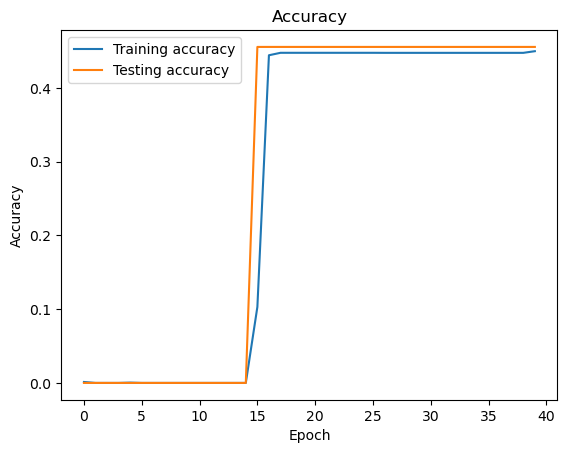

In [23]:
import matplotlib.pyplot as plt

# Get the training and testing accuracies
train_acc = results.history['accuracy']
test_acc = results.history['val_accuracy']

# Get the number of epochs
epochs = len(train_acc)

# Plot the accuracies
plt.plot(train_acc[0:40], label='Training accuracy')
plt.plot(test_acc[0:40], label='Testing accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()